In [1]:
#import libraries
import pandas
import numpy
import pygal
import seaborn as sns

In [2]:
#read in IRIS data file
iris = pandas.read_csv('iris.csv')

In [3]:
#some commands to get familiar with the dataset
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
species_count = pandas.value_counts(iris["Species"])
species_count

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
%matplotlib inline
from IPython.display import SVG, HTML

html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [7]:
# show a bar chart of all the sepal lengths
bar_sepal = pygal.Bar()
bar_sepal.title = "Sepal Lengths"
bar_sepal.add("Septal Length", iris["SepalLengthCm"])
HTML(html_pygal.format(pygal_render=bar_sepal.render()))

In [8]:
# Let's compare sepal lengths and widths in a line chart
line_compare = pygal.StackedLine(fille = True)
line_compare.title = "Sepal Lengths and Widths"
line_compare.add("Sepal Length", iris["SepalLengthCm"][0:10])
line_compare.add("Sepal Width", iris["SepalWidthCm"][0:10])
HTML(html_pygal.format(pygal_render=line_compare.render()))

In [9]:
#i love donut charts so here is one for good measure
pie_chart = pygal.Pie(inner_radius=.5)
pie_chart.title = 'Total area by species'
pie_chart.add('Sepal Area', (iris["SepalLengthCm"]*iris["SepalWidthCm"]).sum())
pie_chart.add('Petal Area', (iris["PetalLengthCm"]*iris["PetalWidthCm"]).sum())
HTML(html_pygal.format(pygal_render=pie_chart.render()))

In [10]:
#switch to matplotlib for different types of charts
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

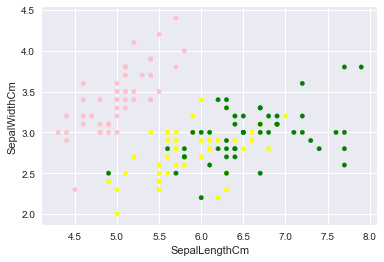

In [11]:
#default colors are teh same, so let's make it even harder by adding in some clashing colors
color_key = {'Iris-setosa':'pink', 'Iris-virginica':'green', 'Iris-versicolor':'yellow'}

iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", c = [color_key[i] for i in iris["Species"]])

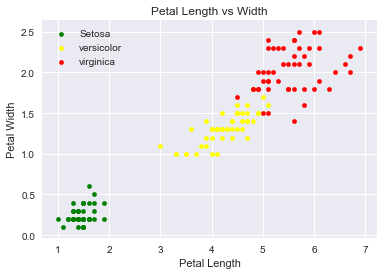

In [13]:
#Now to recreate some of the charts and information from this kernel: https://www.kaggle.com/ash316/ml-from-scratch-with-iris

import matplotlib.pyplot as plt

#Comparing Petal Lngth and Width

plot = iris[iris.Species == 'Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='yellow', label='versicolor', ax=plot)
iris[iris.Species == 'Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='red', label='virginica', ax=plot)

plot.set_xlabel("Petal Length")
plot.set_ylabel("Petal Width")
plot.set_title("Petal Length vs Width")
plot = plt.gcf()
plt.show()


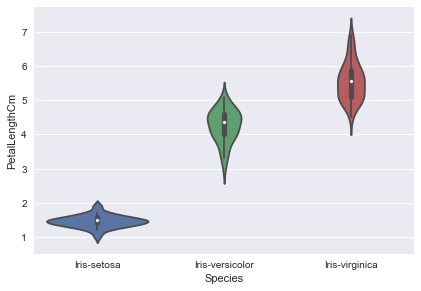

In [15]:
#In this kernel, I was just introduced to a new visualization called a violinplot.  It appears this helps visualize the disparity in the values within a series

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)  #TODO: figure out what this does
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)